# Portfolio Creation

In [11]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_datareader.data as web

In [3]:
#Gathering the data from yahoo

import yfinance as yf

# Define the list of stock tickers and the date range
stock_tickers = ['SHEL.L', 'AZN.L', 'HSBA.L', 'ULVR.L', 'RIO.L', 'BP.L', 'GSK.L', 'DGE.L', 'REL.L', 'GLEN.L']
start_date = '2022-01-01'
end_date = '2024-01-01'

# Create an empty dictionary to store stock data
stock_data_dict = {}

# Fetch the stock data for each ticker
for ticker in stock_tickers:
    try:
        # Fetch the stock data using yfinance
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        
        # Check if the fetched data is valid
        if not stock_data.empty:
            stock_data_dict[ticker] = stock_data[['Adj Close']]
        else:
            print(f"No data found for {ticker}")
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Display the fetched stock data
for ticker, data in stock_data_dict.items():
    print(f"\nStock: {ticker}")
    print(data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Stock: SHEL.L
              Adj Close
Date                   
2022-01-04  1559.182983
2022-01-05  1578.800781
2022-01-06  1575.133911
2022-01-07  1592.001587
2022-01-10  1586.501587
...                 ...
2023-12-21  2529.458984
2023-12-22  2538.856689
2023-12-27  2528.469727
2023-12-28  2521.545166
2023-12-29  2543.802979

[500 rows x 1 columns]

Stock: AZN.L
               Adj Close
Date                    
2022-01-04   7982.672363
2022-01-05   7970.424805
2022-01-06   7872.443359
2022-01-07   7912.955566
2022-01-10   7851.716797
...                  ...
2023-12-21  10318.163086
2023-12-22  10274.841797
2023-12-27  10365.421875
2023-12-28  10410.710938
2023-12-29  10436.309570

[501 rows x 1 columns]

Stock: HSBA.L
             Adj Close
Date                  
2022-01-04  400.304596
2022-01-05  397.587769
2022-01-06  406.035370
2022-01-07  409.473785
2022-01-10  417.709106
...                ...
2023-12-21  590.968140
2023-12-22  595.999695
2023-12-27  599.512268
2023-12-28  599.60

In [4]:
#Creating a dataframe
import pandas as pd

# Convert the dictionary to a pandas DataFrame
stock_data_df = pd.concat(stock_data_dict.values(), keys=stock_data_dict.keys())

# Display the DataFrame
print(stock_data_df)



                     Adj Close
       Date                   
SHEL.L 2022-01-04  1559.182983
       2022-01-05  1578.800781
       2022-01-06  1575.133911
       2022-01-07  1592.001587
       2022-01-10  1586.501587
...                        ...
GLEN.L 2023-12-21   470.200012
       2023-12-22   466.350006
       2023-12-27   471.750000
       2023-12-28   470.049988
       2023-12-29   472.100006

[4997 rows x 1 columns]


In [5]:
#Status check
stock_data_df

Adj Close
       Date                   
SHEL.L 2022-01-04  1559.182983
       2022-01-05  1578.800781
       2022-01-06  1575.133911
       2022-01-07  1592.001587
       2022-01-10  1586.501587
...                        ...
GLEN.L 2023-12-21   470.200012
       2023-12-22   466.350006
       2023-12-27   471.750000
       2023-12-28   470.049988
       2023-12-29   472.100006

[4997 rows x 1 columns]

In [6]:
# Examine the '' Adj Close from the stocks dictionary
print(stock_data_dict['AZN.L'])


               Adj Close
Date                    
2022-01-04   7982.672363
2022-01-05   7970.424805
2022-01-06   7872.443359
2022-01-07   7912.955566
2022-01-10   7851.716797
...                  ...
2023-12-21  10318.163086
2023-12-22  10274.841797
2023-12-27  10365.421875
2023-12-28  10410.710938
2023-12-29  10436.309570

[501 rows x 1 columns]


In [7]:
stock_data_dict['AZN.L'].head()

,Adj Close
Date,
2022-01-04,7982.672363
2022-01-05,7970.424805
2022-01-06,7872.443359
2022-01-07,7912.955566
2022-01-10,7851.716797


In [8]:
# Create 'Normalized Return' column for each stock

for stock_name, stock_data in stock_data_dict.items():
    # Calculate the first adjusted close price for the current stock
    first_adj_close = stock_data.iloc[0]['Adj Close']
    
    # Normalize the adjusted close prices for the current stock
    stock_data.loc[:, 'Normalized Return'] = stock_data['Adj Close'] / first_adj_close

C:\Users\Joshu\AppData\Local\Temp\ipykernel_636\357451876.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.loc[:, 'Normalized Return'] = stock_data['Adj Close'] / first_adj_close


In [9]:
#progress test
stock_data_dict['AZN.L'].head()

,Adj Close,Normalized Return
Date,,
2022-01-04,7982.672363,1.000000
2022-01-05,7970.424805,0.998466
2022-01-06,7872.443359,0.986191
2022-01-07,7912.955566,0.991266
2022-01-10,7851.716797,0.983595


In [10]:
# Create allocation for each stock - equally weighted in our initial portfolio

for stock_name, stock_data in stock_data_dict.items():
  
    #(0.1 because we have 10 stocks in portfolio)
    stock_data.loc[:, 'Allocation'] = stock_data['Normalized Return'] * 0.1

C:\Users\Joshu\AppData\Local\Temp\ipykernel_636\3442669908.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.loc[:, 'Allocation'] = stock_data['Normalized Return'] * 0.1


In [11]:
#Test again

stock_data_dict['SHEL.L'].head()

,Adj Close,Normalized Return,Allocation
Date,,,
2022-01-04,1559.182983,1.000000,0.100000
2022-01-05,1578.800781,1.012582,0.101258
2022-01-06,1575.133911,1.010230,0.101023
2022-01-07,1592.001587,1.021049,0.102105
2022-01-10,1586.501587,1.017521,0.101752


In [12]:
# Set the value of the portfolio to £10k

for stock_name, stock_data in stock_data_dict.items():
   
    stock_data.loc[:, 'Position Value'] = stock_data['Allocation'] * 10000



C:\Users\Joshu\AppData\Local\Temp\ipykernel_636\3133663756.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.loc[:, 'Position Value'] = stock_data['Allocation'] * 10000


In [13]:
#Test again

stock_data_dict['SHEL.L'].head()

,Adj Close,Normalized Return,Allocation,Position Value
Date,,,,
2022-01-04,1559.182983,1.000000,0.100000,1000.000000
2022-01-05,1578.800781,1.012582,0.101258,1012.582101
2022-01-06,1575.133911,1.010230,0.101023,1010.230312
2022-01-07,1592.001587,1.021049,0.102105,1021.048590
2022-01-10,1586.501587,1.017521,0.101752,1017.521102


## Visualizing

In [14]:
# Create position_values dictionary

Position_Values = {}

for stock_name, stock_data in stock_data_dict.items():
    Position_Values[stock_name] = stock_data['Position Value']

In [15]:
# Convert the position_values dictionary to a DataFrame

Position_Values = pd.DataFrame(data = Position_Values)

Position_Values.head()

,SHEL.L,AZN.L,HSBA.L,ULVR.L,RIO.L,BP.L,GSK.L,DGE.L,REL.L,GLEN.L
Date,,,,,,,,,,
2022-01-04,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
2022-01-05,1012.582101,998.465732,993.213100,990.740762,1019.540332,1010.826237,1004.757695,990.130287,991.139279,1013.801133
2022-01-06,1010.230312,986.191466,1014.316033,980.355318,1028.247311,1011.823328,994.616220,969.538109,943.881814,1001.805745
2022-01-07,1021.048590,991.266484,1022.905531,984.609557,1055.381036,1032.905996,1000.626001,944.193862,942.194155,1019.863284
2022-01-10,1017.521102,983.595022,1043.478168,992.617529,1053.356146,1034.330465,1008.764271,937.857831,923.206726,1003.353576


In [16]:
# Add 'Total' column to position values, summing the other columns
Position_Values['Total'] = Position_Values.sum(axis = 1)

In [17]:
Position_Values.head()

,SHEL.L,AZN.L,HSBA.L,ULVR.L,RIO.L,BP.L,GSK.L,DGE.L,REL.L,GLEN.L,Total
Date,,,,,,,,,,,
2022-01-04,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,10000.000000
2022-01-05,1012.582101,998.465732,993.213100,990.740762,1019.540332,1010.826237,1004.757695,990.130287,991.139279,1013.801133,10025.196659
2022-01-06,1010.230312,986.191466,1014.316033,980.355318,1028.247311,1011.823328,994.616220,969.538109,943.881814,1001.805745,9941.005656
2022-01-07,1021.048590,991.266484,1022.905531,984.609557,1055.381036,1032.905996,1000.626001,944.193862,942.194155,1019.863284,10014.994496
2022-01-10,1017.521102,983.595022,1043.478168,992.617529,1053.356146,1034.330465,1008.764271,937.857831,923.206726,1003.353576,9998.080837


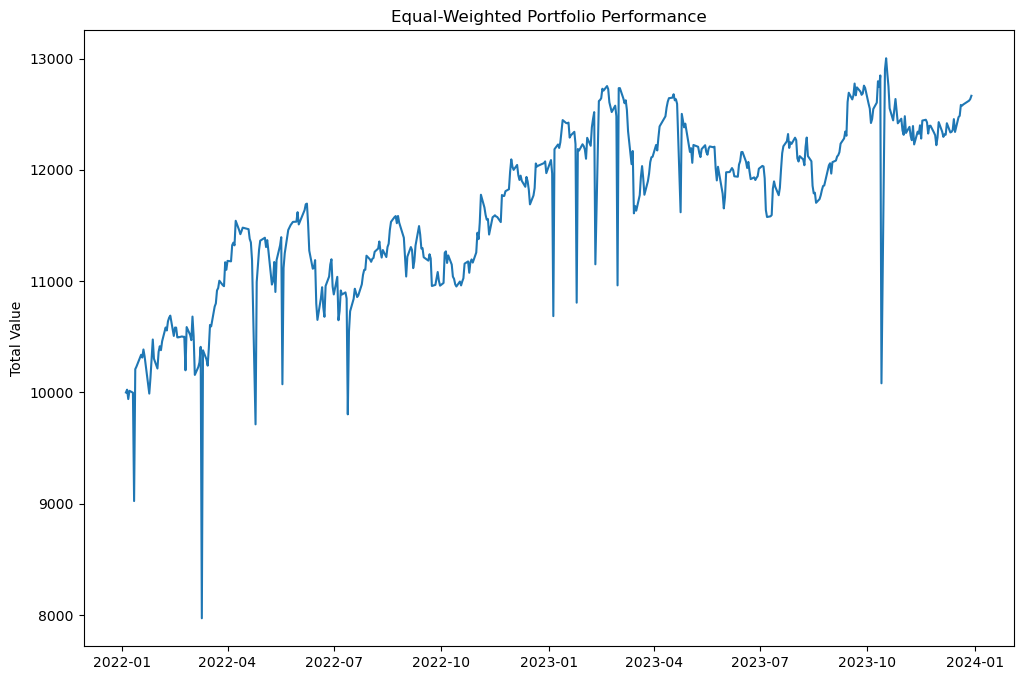

In [18]:
# View the total portfolio
plt.figure(figsize=(12,8))

plt.plot(Position_Values['Total'])

plt.title('Equal-Weighted Portfolio Performance')

plt.ylabel('Total Value');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


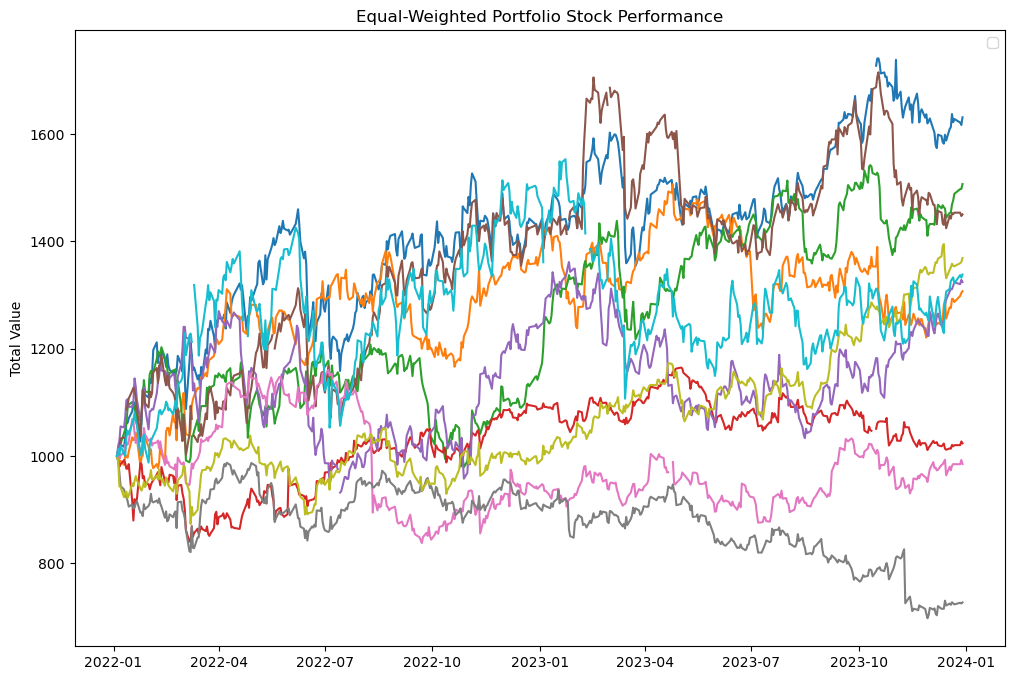

In [19]:
# View the four stocks in the portfolio

plt.figure(figsize=(12,8))

plt.plot(Position_Values.iloc[: ,0:10])

plt.title('Equal-Weighted Portfolio Stock Performance')

plt.ylabel('Total Value');

plt.legend()

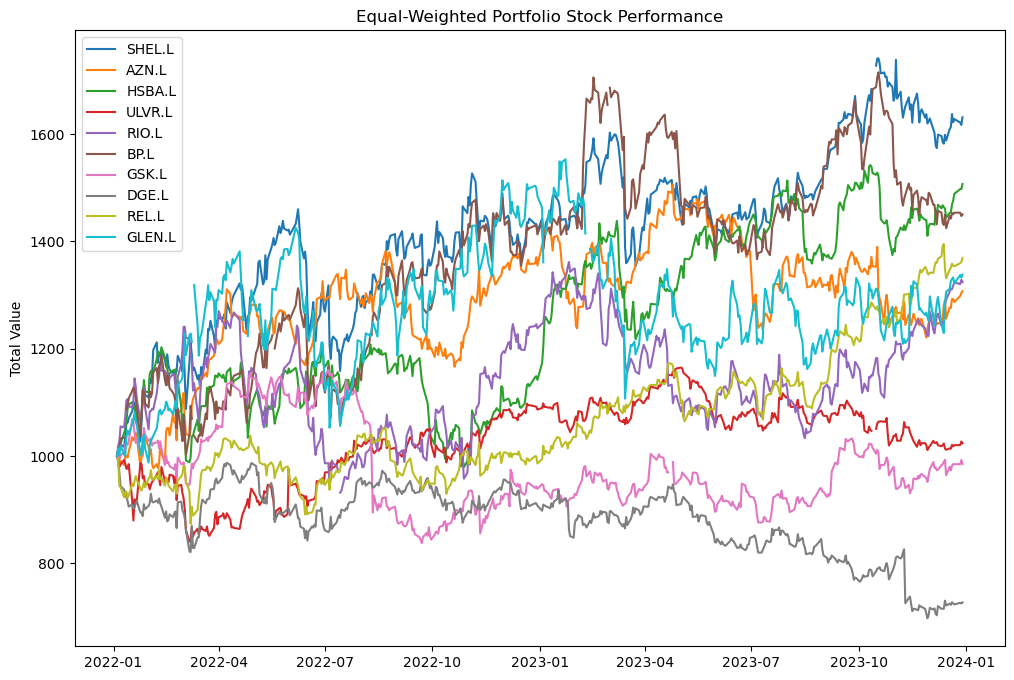

In [20]:
plt.figure(figsize=(12,8))

plt.title('Equal-Weighted Portfolio Stock Performance')

plt.ylabel('Total Value');

for column in Position_Values.columns[:10]:
    plt.plot(Position_Values[column], label=column)


plt.legend()



# Performance Metrics

In [21]:
# Define the end and start value of the portfolio

End_value = Position_Values['Total'][-1]
Start_value = Position_Values['Total'][0]

# Calculate the cumulative portfolio return as a percentage

cumulative_return = End_value / Start_value -1

print(cumulative_return)

0.2665074481851526


C:\Users\Joshu\AppData\Local\Temp\ipykernel_636\2242547188.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  End_value = Position_Values['Total'][-1]
C:\Users\Joshu\AppData\Local\Temp\ipykernel_636\2242547188.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Start_value = Position_Values['Total'][0]


In [22]:
# Create a 'Daily Returns' column

Position_Values['Daily Returns'] = Position_Values['Total'].pct_change()

Position_Values.head()

,SHEL.L,AZN.L,HSBA.L,ULVR.L,RIO.L,BP.L,GSK.L,DGE.L,REL.L,GLEN.L,Total,Daily Returns
Date,,,,,,,,,,,,
2022-01-04,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,10000.000000,NaN
2022-01-05,1012.582101,998.465732,993.213100,990.740762,1019.540332,1010.826237,1004.757695,990.130287,991.139279,1013.801133,10025.196659,0.002520
2022-01-06,1010.230312,986.191466,1014.316033,980.355318,1028.247311,1011.823328,994.616220,969.538109,943.881814,1001.805745,9941.005656,-0.008398
2022-01-07,1021.048590,991.266484,1022.905531,984.609557,1055.381036,1032.905996,1000.626001,944.193862,942.194155,1019.863284,10014.994496,0.007443
2022-01-10,1017.521102,983.595022,1043.478168,992.617529,1053.356146,1034.330465,1008.764271,937.857831,923.206726,1003.353576,9998.080837,-0.001689


In [23]:
# Calculate the mean Daily Return 

Mean_Daily_Return = Position_Values['Daily Returns'].mean()

print('The mean daily return is:',str(Mean_Daily_Return))

The mean daily return is: 0.0010204470475067159


In [24]:
# Calculate the standard deviation of Daily Return 

Std_Daily_Return = Position_Values['Daily Returns'].std()

print('The std daily return is:',str(Std_Daily_Return))

The std daily return is: 0.03344257690352948


In [25]:
# Calculate the sharpe ratio (assuming risk free is aroun 0)
Sharpe_Ratio = Mean_Daily_Return / Std_Daily_Return
Sharpe_Ratio

0.03051340961105839

In [26]:
# Calculate the annualized sharpe ratio

Sharpe_Ratio_Annualized = Sharpe_Ratio * 252**0.5

Sharpe_Ratio_Annualized

0.4843853609010517

# Prepare scenarios to optimize portfolio weighting

In [27]:
# Create stock_adj_close dictionary

Stock_Adj_Close = {}

for stock_name, stock_data in stock_data_dict.items():
    Stock_Adj_Close[stock_name] = stock_data['Adj Close']

In [28]:
Stock_Adj_Close = pd.DataFrame(data=Stock_Adj_Close)

Stock_Adj_Close.head()

,SHEL.L,AZN.L,HSBA.L,ULVR.L,RIO.L,BP.L,GSK.L,DGE.L,REL.L,GLEN.L
Date,,,,,,,,,,
2022-01-04,1559.182983,7982.672363,400.304596,3677.914795,4233.931152,317.543854,1457.625366,3884.768799,2271.342529,352.725494
2022-01-05,1578.800781,7970.424805,397.587769,3643.860107,4316.663574,320.981659,1464.560303,3846.427246,2251.216797,357.593506
2022-01-06,1575.133911,7872.443359,406.035370,3605.663330,4353.528320,321.298279,1449.777832,3766.431396,2143.878906,353.362427
2022-01-07,1592.001587,7912.955566,409.473785,3621.310059,4468.410645,327.992950,1458.537842,3667.974854,2140.045654,359.731781
2022-01-10,1586.501587,7851.716797,417.709106,3650.762695,4459.837402,328.445282,1470.400391,3643.360840,2096.918701,353.908386


In [29]:
# Create stock_returns DataFrames to see the day over day change in stock value
Stock_Returns = Stock_Adj_Close.pct_change()

Stock_Returns.head()

C:\Users\Joshu\AppData\Local\Temp\ipykernel_636\3317197600.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  Stock_Returns = Stock_Adj_Close.pct_change()


,SHEL.L,AZN.L,HSBA.L,ULVR.L,RIO.L,BP.L,GSK.L,DGE.L,REL.L,GLEN.L
Date,,,,,,,,,,
2022-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,0.012582,-0.001534,-0.006787,-0.009259,0.019540,0.010826,0.004758,-0.009870,-0.008861,0.013801
2022-01-06,-0.002323,-0.012293,0.021247,-0.010483,0.008540,0.000986,-0.010093,-0.020797,-0.047680,-0.011832
2022-01-07,0.010709,0.005146,0.008468,0.004339,0.026388,0.020836,0.006042,-0.026141,-0.001788,0.018025
2022-01-10,-0.003455,-0.007739,0.020112,0.008133,-0.001919,0.001379,0.008133,-0.006711,-0.020152,-0.016188


# 10,000 Portfolio Scenarios

In [30]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario

Scenarios = 10000

Weights_Array = np.zeros((Scenarios, len(Stock_Returns.columns)))

Weights_Array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
# Create additional blank arrays for scenario output

Returns_Array = np.zeros(Scenarios)

Volatility_Array = np.zeros(Scenarios)

Sharpe_Array = np.zeros(Scenarios)

In [42]:
# Import the random package and set the seeds
import random
random.seed(9)
np.random.seed(9)

# Generate ten random numbers for each index
# Divide each number by the sum of the numbers to generate the random weight
# Save the weights in weights_array
# Calculate the return for each scenario
# Calculate the expected volatility for each scenario similar to 'portfolio volatility formula'
# Calculate the Sharpe Ratio for each scenario 

for index in range(Scenarios):
    Numbers = np.array(np.random.random(10))
    Weights = Numbers / np.sum(Numbers)
    Weights_Array[index,:] = Weights
    Returns_Array[index] = np.sum(Stock_Returns.mean()*252*Weights)
    Volatility_Array[index] = np.sqrt(np.dot(Weights.T,np.dot(Stock_Returns.cov()*252, Weights)))
    Sharpe_Array[index] = Returns_Array[index] / Volatility_Array[index]



In [43]:
print("The first combination:", Weights_Array[0])

The first combination: [0.00399207 0.19312607 0.19077823 0.05149886 0.05468568 0.08410344
 0.16104589 0.09547167 0.03234695 0.13295113]


In [44]:
print("The sharpe ratio of the first portfolio:", Sharpe_Array[0])

The sharpe ratio of the first portfolio: 0.8604392806799698


# Identify the Optimal Portfolio

In [45]:
# Find the highest sharpe ratio in sharpe_array

Sharpe_Array.max()

1.287477461379825

In [50]:
# Find the index of the optimal portfolio
Index_Max_Sharpe = Sharpe_Array.argmax()

Index_Max_Sharpe

658

In [54]:
# Print the optimal weights for each stock
print(stock_tickers)
print(Weights_Array[Index_Max_Sharpe,:])

['SHEL.L', 'AZN.L', 'HSBA.L', 'ULVR.L', 'RIO.L', 'BP.L', 'GSK.L', 'DGE.L', 'REL.L', 'GLEN.L']
[0.24632542 0.22895792 0.13039071 0.11214169 0.01753892 0.03260914
 0.03518471 0.00220906 0.19197254 0.00266989]


# Visualize the Optimal Portfolio and Scenario

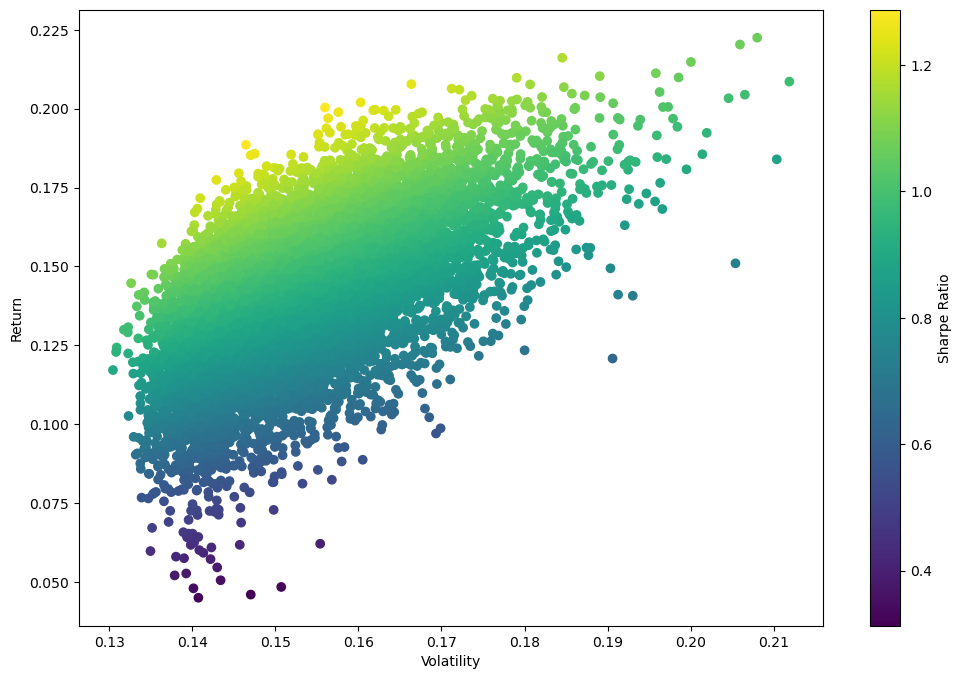

In [55]:
# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(Volatility_Array, Returns_Array, c=Sharpe_Array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')

plt.xlabel('Volatility')

plt.ylabel('Return');

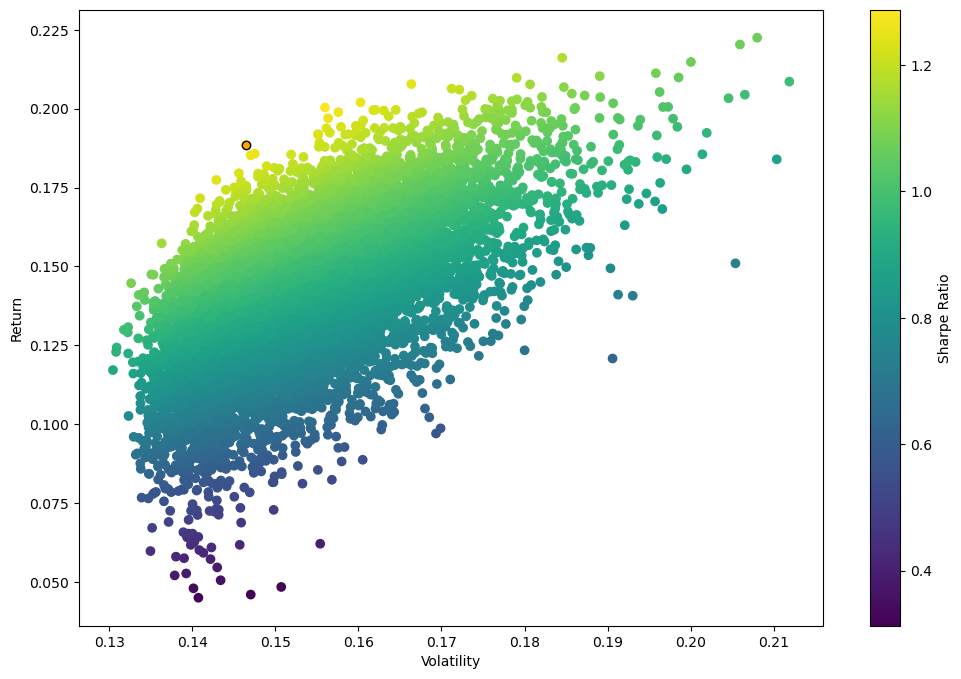

In [56]:
# Identify the optimal portfolio in the returns and volatility arrays

Max_Sharpe_Return = Returns_Array[Index_Max_Sharpe]
Max_Sharpe_Volatility = Volatility_Array[Index_Max_Sharpe]
# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(Volatility_Array, Returns_Array, c=Sharpe_Array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')

plt.xlabel('Volatility')

plt.ylabel('Return');

# Add the optimal portfolio to the visual
plt.scatter(Max_Sharpe_Volatility, Max_Sharpe_Return, c='orange',edgecolors='black');